# **DataPlay Reviews Word Cloud using NLP**

## Author
DINESH S  
[my linkedin profile](https://www.linkedin.com/in/dinesh-x/) | [github link](https://github.com/itzdineshx/Data_Play_Fellowship) |
 [Data Play](https://dataplay.co.in/)

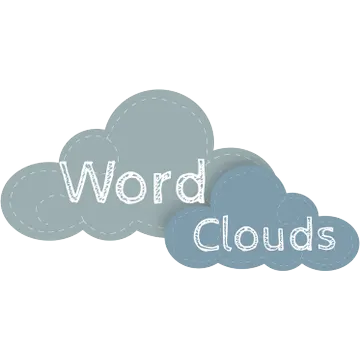

# **Task 1:**
```
1.DataPlay Reviews WordCloud
Level 1:"Using Excel Functions/Pivot Table getting word frequency count, removing stopwords"
Level 2:Use Tf-Idf
Level 3:Now implement (Dictionary of words with their frequency of occurrence) word cloud in Power BI
```


## Overview

This notebook demonstrates how to process and analyze review data from DataPlay using Python. The main objectives are to:

- **Load and preprocess the data**: Combine data from a CSV file (with words in separate cells), clean the text, and remove stopwords.
- **Compute word frequencies and/or TF-IDF scores**: Generate a dictionary (or table) of words along with their frequency counts or TF-IDF weights.
- **Visualize the results with a Word Cloud**: Use the `wordcloud` and `matplotlib` libraries to create a visual representation of the most significant words in the reviews.

## Prerequisites

Before running the notebook, ensure you have the following Python packages installed:

- **pandas**: For data manipulation and CSV file reading.  
- **nltk**: For natural language processing tasks such as stopwords removal.  
- **wordcloud**: To generate the word cloud visualization.  
- **matplotlib**: To display the generated word cloud.  
- **re**: For regular expression operations.

You can install the required packages using pip:

```bash
pip install pandas nltk wordcloud matplotlib
```

Additionally, the notebook downloads necessary NLTK data (stopwords) if not already present.

In [ ]:
#installing required Dependencies
!pip install pandas nltk wordcloud matplotlib

In [ ]:
#initializing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#initializing Dependencies for NLP
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter

In [ ]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### **Step 1: Load the CSV File**

In [ ]:
df = pd.read_csv('/content/DataPlay_Reviews_unique_keyword - unique_keyword.csv', header=None)

In [ ]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,had,a,fantastic,experience,at,DataPlay.,The,institute,offers,excellent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,to,me,it's,a,very,good,place,for,learning,with,...,just,because,of,their,student,friendly,teaching.,NaN,NaN,NaN
2,sir,and,Mahima,ma'am,have,outstanding,sessions,that,help,you,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,it,has,been,a,great,"experience,",the,mentors,are,really,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,days,agoNew\nMy,overall,experience,was,great.,Mentors,were,incredibly,"supportive,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Step 2: Data Cleaning and Preprocessing**

### **Text preprocessing**

In [ ]:
# Combine all words from the DataFrame into a single text string
all_words = " ".join(df.fillna('').astype(str).values.flatten())

In [ ]:
# Convert to lowercase and remove punctuation
clean_text = re.sub(r'[^\w\s]', '', all_words.lower())

### **Remove stopwords**

In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in clean_text.split() if word not in stop_words]

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
# Join the filtered words back into a single string
processed_text = " ".join(filtered_words)
processed_text

'fantastic experience dataplay institute offers excellent training data analysis covering statistics excel operations power bi tools knowledgeable instructors comprehensive materials make top choice aspiring data scientists highly recommended quality education handson learning good place learning good hearted teachers institutes put efforts towards students average dataplay put efforts every single student teaching style nice im new course didnt wonder softly understand every single thing thought possible student friendly teaching sir mahima maam outstanding sessions help gain clarity improve skills great experience mentors really helpful well job making classes engaging interactive days agonew overall experience great mentors incredibly supportive effectively explaining tools concepts reallife scenariosi gained valuable handson experience power bi excel engaged discussions interview questions significantly improved knowledge throughout course explanations start basics content easy und

### **Pivot Table getting word frequency count**

In [ ]:
# Create a DataFrame from word_frequencies
word_freq_df = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['Frequency'])
word_freq_df.index.name = 'Word'
word_freq_df = word_freq_df.reset_index()

# Create the pivot table
pivot_table = pd.pivot_table(word_freq_df, values='Frequency', index='Word', aggfunc='sum')

# Display the pivot table
pivot_table


,Frequency
Word,
achieve,1
advanced,1
agonew,1
algorithms,1
also,1
...,...
wonder,1
work,5
working,2


# **Step 3: Data Analysis**

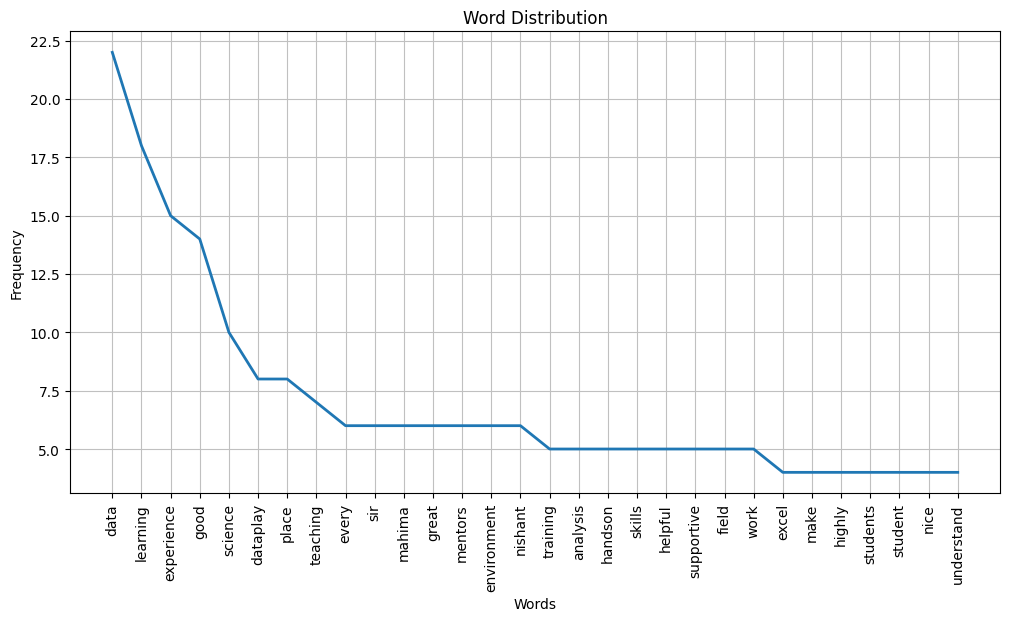

In [ ]:
# Word Distribution
word_frequencies = nltk.FreqDist(filtered_words)

# Plot the word distribution
plt.figure(figsize=(12, 6))
word_frequencies.plot(30, cumulative=False)
plt.title('Word Distribution')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


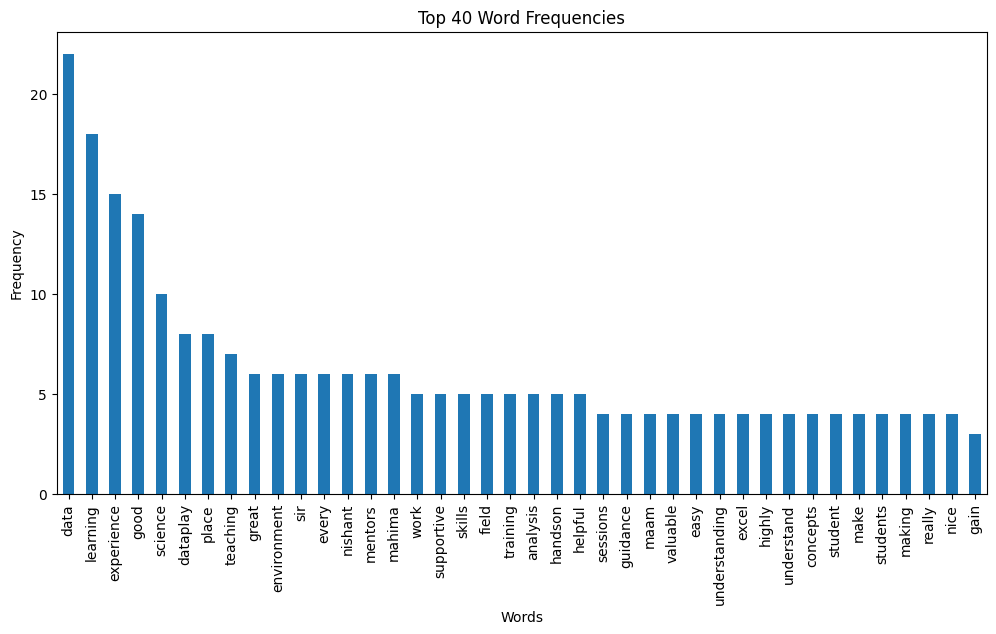

In [ ]:
# Histogram of word frequencies
word_counts = pd.Series(processed_text.split()).value_counts()
plt.figure(figsize=(12, 6))
word_counts[:40].plot(kind='bar')
plt.title('Top 40 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### **TF-IDF scores**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([processed_text]) # Fit and transform the text data

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

In [ ]:
# Create a DataFrame for TF-IDF scores
tfidf_df = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort by TF-IDF score in descending order
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Display the top N words with their TF-IDF scores
tfidf_df

,Word,TF-IDF Score
58,data,0.412098
175,learning,0.337171
100,experience,0.280976
126,good,0.262244
258,science,0.187317
...,...,...
136,guiding,0.018732
140,helped,0.018732
142,helping,0.018732
143,helps,0.018732


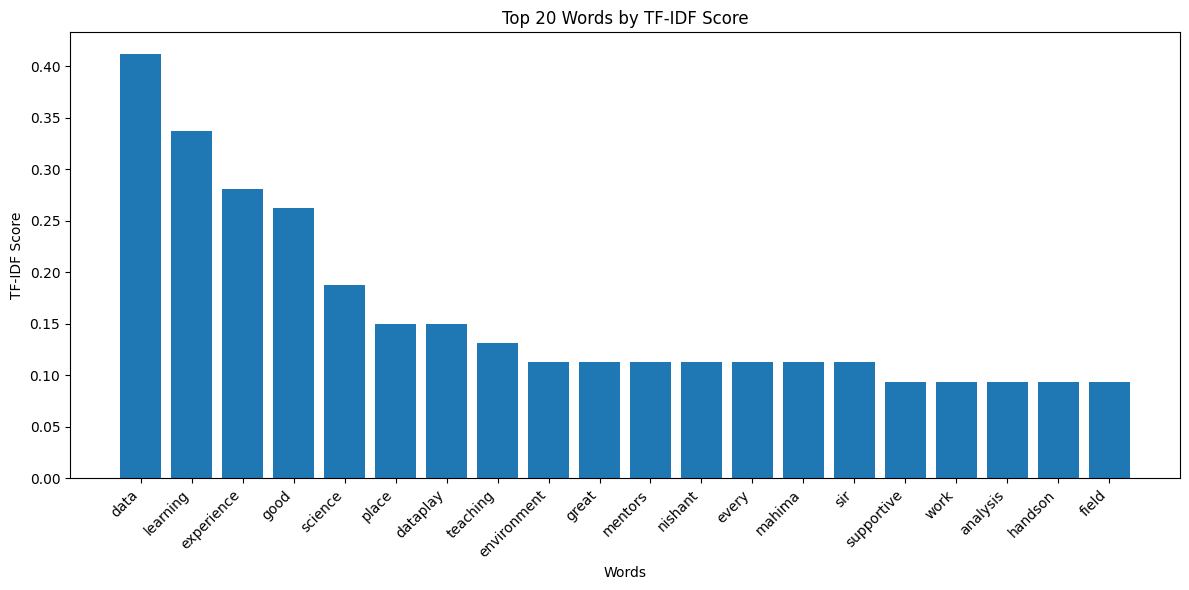

In [ ]:
#create a bar plot of the top words
plt.figure(figsize=(12, 6))
plt.bar(tfidf_df['Word'][:20], tfidf_df['TF-IDF Score'][:20])
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.title('Top 20 Words by TF-IDF Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### **Creating word cloud**

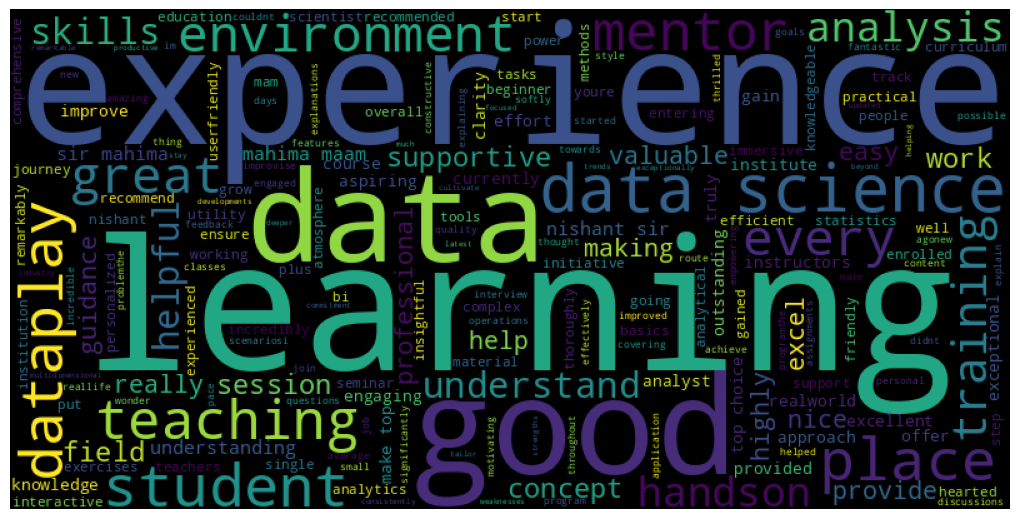

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(processed_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
# Save the wordcloud image
wordcloud.to_file("review_wordcloud.png")

In [ ]:
# save all the data

# Save the pivot table to a CSV file
pivot_table.to_csv('pivot_table.csv')

# Save word frequencies to a CSV file
word_freq_df.to_csv('word_frequencies.csv', index=False)

# Save the TF-IDF DataFrame to a CSV file
tfidf_df.to_csv('tfidf_scores.csv', index=False)

### **Conclusion**

This notebook processes raw review data to create a meaningful word cloud. It demonstrates:
- Loading CSV data and handling data spread across multiple cells.
- Text cleaning, tokenization, and stopwords removal.
- Word frequency calculation (with an option to compute TF-IDF scores).
- Visualization of the processed data with a word cloud.
- How to integrate your Python workflow into Power BI via Python visuals.

This documentation should help you (or anyone else reviewing the notebook) understand the purpose, methods, and steps involved in the analysis. It also provides guidance on leveraging Python within Power BI, ensuring that your work meets submission requirements without needing to rebuild the process entirely in Power BI’s native tools.


## Acknowledgements

**Special Thanks:**  
I would like to extend my heartfelt gratitude to DataPlay Company for the fellowship. This opportunity has been instrumental in enhancing my skills and enabling projects like this to flourish.



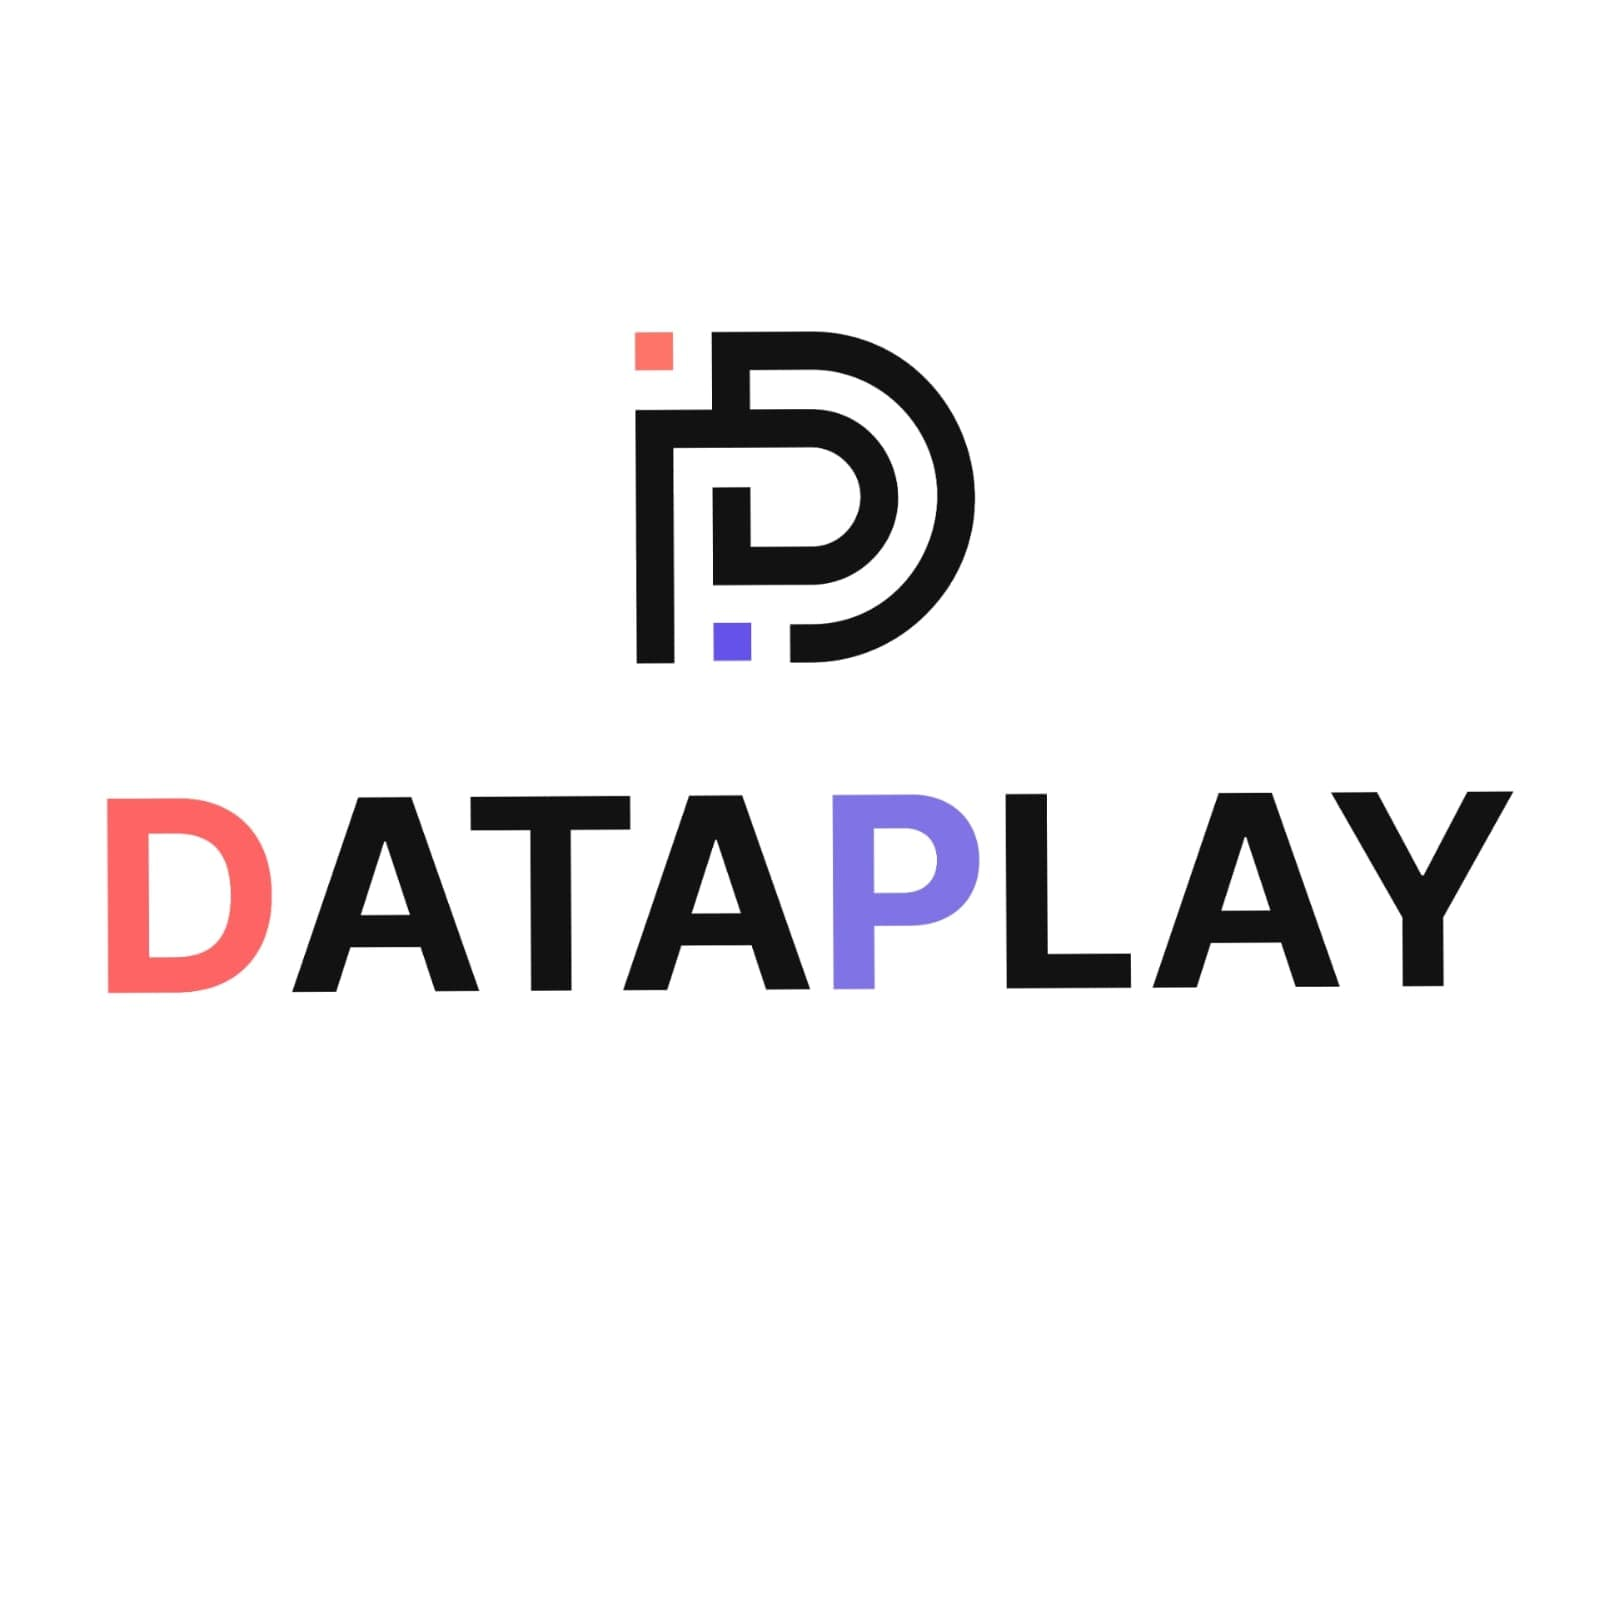

---

*End of Notebook*